# Super resolution in CoLab
The test image and model are from https://github.com/Luchixiang/EMDiffuse

Please enable GPU in colab.


**Dependency for Execution**

In [1]:
!git clone https://github.com/Luchixiang/EMDiffuse
#Must be in the EMDiffuse directory to run the EMDiffuse code
%cd EMDiffuse/
!pip install -r requirements.txt

Cloning into 'EMDiffuse'...
remote: Enumerating objects: 925, done.
remote: Counting objects: 100% (272/272), done.
remote: Compressing objects: 100% (155/155), done.
remote: Total 925 (delta 124), reused 256 (delta 113), pack-reused 653 (from 1)
Receiving objects: 100% (925/925), 80.20 MiB | 16.50 MiB/s, done.
Resolving deltas: 100% (422/422), done.
/content/EMDiffuse
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_

In [6]:
import requests
import os

def download_file(url, save_path):
    response = requests.get(url, stream=True)
    response.raise_for_status()  # Check for HTTP errors

    with open(save_path, 'wb') as file:
        for chunk in response.iter_content(chunk_size=8192):
            if chunk:  # Filter out keep-alive chunks
                file.write(chunk)
# URLs of the files to be downloaded
urls = {
    'api.py': 'https://raw.githubusercontent.com/Max-ChenFei/super_resolution/main/api.py',
    'image.tif': 'https://raw.githubusercontent.com/Max-ChenFei/super_resolution/main/image.tif'
}

for file_name, url in urls.items():
    save_path = os.path.join(os.getcwd(), file_name)
    download_file(url, save_path)
    print(f"Downloaded {file_name} to {save_path}")

Downloaded api.py to /content/EMDiffuse/api.py
Downloaded image.tif to /content/EMDiffuse/image.tif


**Usage**

sampling loop time step: 100%|██████████| 200/200 [00:12<00:00, 15.62it/s]

torch.Size([1, 1, 256, 256])
torch.float32
cuda:0


(-0.5, 255.5, 255.5, -0.5)

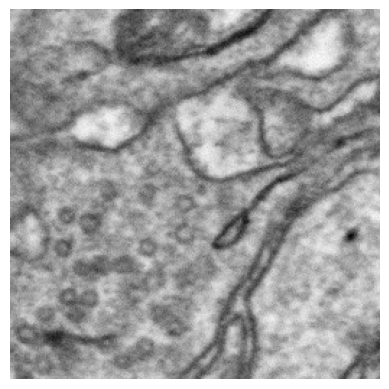

In [7]:
import os
from PIL import Image
import torch
from torchvision import transforms
import matplotlib.pyplot as plt
from api import super_resolution
import contextlib

image_path = os.path.join("image.tif")
image = Image.open(image_path)
to_tensor = transforms.ToTensor()
tensor = to_tensor(image).unsqueeze(0)
input_image = tensor.to(torch.device("cuda"))

output_image = super_resolution(input_image, 2)

print(output_image.shape)
print(output_image.dtype)
print(output_image.device)

plt.imshow(output_image.squeeze().cpu().numpy(), cmap="gray")
plt.axis("off")